###  Tweet Analysis of the China-Taiwan-US Current Political Situation

An end to end Machine Learning project on Natural Language Processing to analyze data collected from tweets about the China-US- Taiwan situation; from collecting tweets to deploying results on the dashboard.

## Business understanding.

The current China-US-Taiwan crisis has fueled a lot of tension in the affected countries which might significantly affect the economy. People doing business around China, US, and Taiwan may be greatly affected. We can gauge how people around the world are feeling about it and in turn, give them insights to make better decisions about their business. This can also be applied for research purposes.


## Exploratory Data Analysis.

Data exploration and pre-processing to perform data reading, pre-processing and data exploration and visualisations.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import STOPWORDS,WordCloud
from gensim import corpora
import pandas as pd
import statistics
import string
import os
import re
import sys

sys.path.append(os.path.abspath(os.path.join("./..")))

# custom modules from Day-1
from extract_dataframe import read_json, TweetDfExtractor
from clean_tweets_dataframe import Clean_Tweets
from Data_preparation import DataPreparation

We then use the python script extract_dataframe to extract tweets into the dataframe, by using read_json function, then the dataframe from the tweet_list.

In [2]:
_, tweet_list = read_json("../data/global_twitter_data.json")
tweet = TweetDfExtractor(tweet_list)
tweet_data = tweet.get_tweet_df(save=False)
tweet_data.head(5)

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,Sun Aug 07 22:31:20 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @i_ameztoy: Extra random image (I):\n\nLets...,-1.250000e-01,0.190625,en,0,2,i_ameztoy,20497,2621,None,"[{'text': 'City', 'indices': [132, 137]}]","[{'screen_name': 'i_ameztoy', 'name': 'Iban Am...",
1,Sun Aug 07 22:31:16 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @IndoPac_Info: #China's media explains the ...,-1.000000e-01,0.100000,en,0,201,ZIisq,65,272,None,"[{'text': 'China', 'indices': [18, 24]}, {'tex...","[{'screen_name': 'IndoPac_Info', 'name': 'Indo...",
2,Sun Aug 07 22:31:07 +0000 2022,"<a href=""http://twitter.com/download/android"" ...","China even cut off communication, they don't a...",0.000000e+00,0.000000,en,0,0,Fin21Free,85,392,None,"[{'text': 'XiJinping', 'indices': [127, 137]}]","[{'screen_name': 'ZelenskyyUa', 'name': 'Волод...",Netherlands
3,Sun Aug 07 22:31:06 +0000 2022,"<a href=""http://twitter.com/download/android"" ...","Putin to #XiJinping : I told you my friend, Ta...",1.000000e-01,0.350000,en,0,0,Fin21Free,85,392,None,"[{'text': 'XiJinping', 'indices': [9, 19]}]",[],Netherlands
4,Sun Aug 07 22:31:04 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...","RT @ChinaUncensored: I’m sorry, I thought Taiw...",-6.938894e-18,0.556250,en,0,381,VizziniDolores,910,2608,None,[],"[{'screen_name': 'ChinaUncensored', 'name': 'C...","Ayent, Schweiz"


In [3]:
tweet_data.shape[0]

22000

The list of columns are;

In [4]:
#tweet_data.info() 
tweet_data.head()


,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,Sun Aug 07 22:31:20 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @i_ameztoy: Extra random image (I):\n\nLets...,-1.250000e-01,0.190625,en,0,2,i_ameztoy,20497,2621,None,"[{'text': 'City', 'indices': [132, 137]}]","[{'screen_name': 'i_ameztoy', 'name': 'Iban Am...",
1,Sun Aug 07 22:31:16 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @IndoPac_Info: #China's media explains the ...,-1.000000e-01,0.100000,en,0,201,ZIisq,65,272,None,"[{'text': 'China', 'indices': [18, 24]}, {'tex...","[{'screen_name': 'IndoPac_Info', 'name': 'Indo...",
2,Sun Aug 07 22:31:07 +0000 2022,"<a href=""http://twitter.com/download/android"" ...","China even cut off communication, they don't a...",0.000000e+00,0.000000,en,0,0,Fin21Free,85,392,None,"[{'text': 'XiJinping', 'indices': [127, 137]}]","[{'screen_name': 'ZelenskyyUa', 'name': 'Волод...",Netherlands
3,Sun Aug 07 22:31:06 +0000 2022,"<a href=""http://twitter.com/download/android"" ...","Putin to #XiJinping : I told you my friend, Ta...",1.000000e-01,0.350000,en,0,0,Fin21Free,85,392,None,"[{'text': 'XiJinping', 'indices': [9, 19]}]",[],Netherlands
4,Sun Aug 07 22:31:04 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...","RT @ChinaUncensored: I’m sorry, I thought Taiw...",-6.938894e-18,0.556250,en,0,381,VizziniDolores,910,2608,None,[],"[{'screen_name': 'ChinaUncensored', 'name': 'C...","Ayent, Schweiz"


From this columns, we can identify the number of missing rows in every column and visualize it on barchart.

In [5]:
missing_values = tweet_data.isnull().sum()
print(f"Missing value(s) count: \n{missing_values}")

Missing value(s) count: 
created_at                0
source                    0
original_text             0
polarity                  0
subjectivity              0
lang                      0
favorite_count            0
retweet_count             0
original_author           0
followers_count           0
friends_count             0
possibly_sensitive    15809
hashtags                  0
user_mentions             0
place                     0
dtype: int64


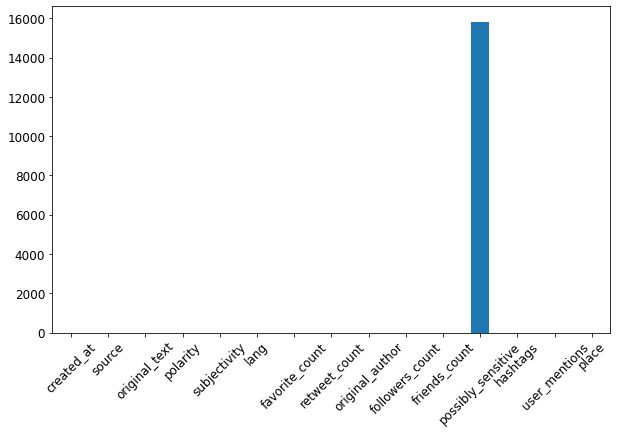

In [6]:
fig = missing_values.plot(kind='bar',fontsize=12, figsize=(10, 6), rot=45).get_figure()
fig.savefig("missing_values_bar_chart.png")

Univariate analysis of hashtags

In [7]:
#Method to find hashtags from tweets
def find_hashtags(tweet):
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

In [8]:
# update Hashtag column with hashtags extracted from Orignal_text columon
tweet_data['hashtags'] = tweet_data['original_text'].apply(find_hashtags)

# take the rows from the hashtag columns where there are actually hashtags
hashtags_list_df = tweet_data.loc[
                       tweet_data.hashtags.apply(
                           lambda hashtags_list: hashtags_list !=[]
                       ),['hashtags']]
hashtags_list_df

,hashtags
0,"[#City, #Ta]"
1,"[#China, #Taiwan]"
2,[#XiJinping]
3,[#XiJinping]
5,[#Taiwan]
...,...
21995,"[#China, #Taiwan, #ChinaTaiwanCrisis]"
21996,"[#China, #Taiwan, #ChinaTaiwanCrisis]"
21997,[#Pelosi]
21998,"[#Taiwan, #China]"


In [9]:
#create dataframe where each use of hashtag gets its own row
flattened_hashtags_df = pd.DataFrame(
    [hashtag for hashtags_list in hashtags_list_df.hashtags
    for hashtag in hashtags_list],
    columns=['hashtag'])

In [10]:
#add flatten_hashtags to tweet_df
tweet_data["flattened_hashtags"]= flattened_hashtags_df
tweet_data.head()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,flattened_hashtags
0,Sun Aug 07 22:31:20 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @i_ameztoy: Extra random image (I):\n\nLets...,-1.250000e-01,0.190625,en,0,2,i_ameztoy,20497,2621,None,"[#City, #Ta]","[{'screen_name': 'i_ameztoy', 'name': 'Iban Am...",,#City
1,Sun Aug 07 22:31:16 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @IndoPac_Info: #China's media explains the ...,-1.000000e-01,0.100000,en,0,201,ZIisq,65,272,None,"[#China, #Taiwan]","[{'screen_name': 'IndoPac_Info', 'name': 'Indo...",,#Ta
2,Sun Aug 07 22:31:07 +0000 2022,"<a href=""http://twitter.com/download/android"" ...","China even cut off communication, they don't a...",0.000000e+00,0.000000,en,0,0,Fin21Free,85,392,None,[#XiJinping],"[{'screen_name': 'ZelenskyyUa', 'name': 'Волод...",Netherlands,#China
3,Sun Aug 07 22:31:06 +0000 2022,"<a href=""http://twitter.com/download/android"" ...","Putin to #XiJinping : I told you my friend, Ta...",1.000000e-01,0.350000,en,0,0,Fin21Free,85,392,None,[#XiJinping],[],Netherlands,#Taiwan
4,Sun Aug 07 22:31:04 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...","RT @ChinaUncensored: I’m sorry, I thought Taiw...",-6.938894e-18,0.556250,en,0,381,VizziniDolores,910,2608,None,[],"[{'screen_name': 'ChinaUncensored', 'name': 'C...","Ayent, Schweiz",#XiJinping


<AxesSubplot:>

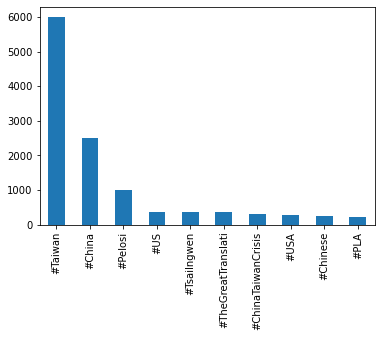

In [11]:
# To plot Top 20 Hashtags
tweet_data['flattened_hashtags'].value_counts()[:10].plot(kind='bar')


Analysing the User mentions

In [12]:
#Method to find hashtags from tweets
def find_hashtags(tweet):
    return re.findall('(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

In [13]:
# update Hashtag column with hashtags extracted from Orignal_text columon
tweet_data['user_mentions'] = tweet_data['original_text'].apply(find_hashtags)

# take the rows from the hashtag columns where there are actually hashtags
user_mentions_list_df = tweet_data.loc[
                       tweet_data.user_mentions.apply(
                           lambda user_mentions_list_df: user_mentions_list_df !=[]
                       ),['user_mentions']]
user_mentions_list_df

,user_mentions
0,[@i_ameztoy]
1,[@IndoPac_Info]
2,[@ZelenskyyUa]
4,[@ChinaUncensored]
5,[@benedictrogers]
...,...
21995,[@IndoPac_Info]
21996,[@IndoPac_Info]
21997,[@Reuters]
21998,[@IndoPac_Info]


In [14]:
#create dataframe where each use of hashtag gets its own row
flattened_user_mentions_df = pd.DataFrame(
    [user_mention for user_mentions_list in user_mentions_list_df.user_mentions
    for user_mention in user_mentions_list],
    columns=['user_mentions'])

In [15]:
#add flatten_hashtags to tweet_df
tweet_data["flattened_user_mentions"]= flattened_user_mentions_df
tweet_data.head()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,flattened_hashtags,flattened_user_mentions
0,Sun Aug 07 22:31:20 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @i_ameztoy: Extra random image (I):\n\nLets...,-1.250000e-01,0.190625,en,0,2,i_ameztoy,20497,2621,None,"[#City, #Ta]",[@i_ameztoy],,#City,@i_ameztoy
1,Sun Aug 07 22:31:16 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @IndoPac_Info: #China's media explains the ...,-1.000000e-01,0.100000,en,0,201,ZIisq,65,272,None,"[#China, #Taiwan]",[@IndoPac_Info],,#Ta,@IndoPac_Info
2,Sun Aug 07 22:31:07 +0000 2022,"<a href=""http://twitter.com/download/android"" ...","China even cut off communication, they don't a...",0.000000e+00,0.000000,en,0,0,Fin21Free,85,392,None,[#XiJinping],[@ZelenskyyUa],Netherlands,#China,@ZelenskyyUa
3,Sun Aug 07 22:31:06 +0000 2022,"<a href=""http://twitter.com/download/android"" ...","Putin to #XiJinping : I told you my friend, Ta...",1.000000e-01,0.350000,en,0,0,Fin21Free,85,392,None,[#XiJinping],[],Netherlands,#Taiwan,@ChinaUncensored
4,Sun Aug 07 22:31:04 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...","RT @ChinaUncensored: I’m sorry, I thought Taiw...",-6.938894e-18,0.556250,en,0,381,VizziniDolores,910,2608,None,[],[@ChinaUncensored],"Ayent, Schweiz",#XiJinping,@benedictrogers


<AxesSubplot:>

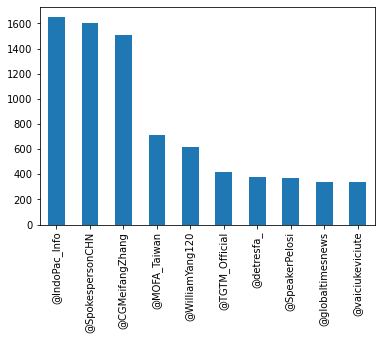

In [16]:
tweet_data['flattened_user_mentions'].value_counts()[:10].plot(kind='bar')


In [17]:
#text Preprocessing
tweet_data['original_text'] = tweet_data['original_text'].astype(str)
tweet_data['original_text'] = tweet_data['original_text'].apply(lambda x: x.lower())
tweet_data['original_text']= tweet_data['original_text'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))


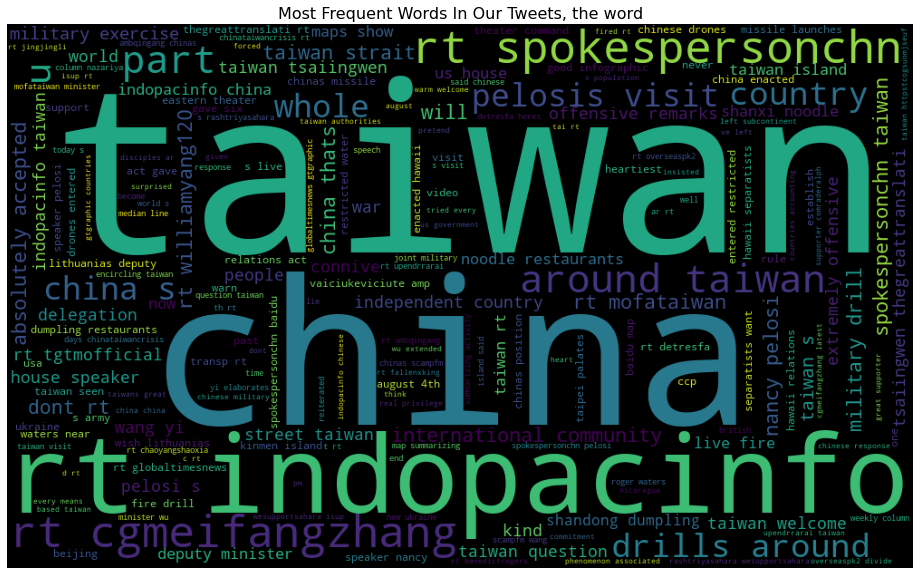

In [18]:
plt.figure(figsize=(20, 10))
plt.imshow(WordCloud(width=1000,height=600,stopwords=STOPWORDS).generate(' '.join(tweet_data.original_text .values)))
plt.axis('off')
plt.title('Most Frequent Words In Our Tweets, the word',fontsize=16)
plt.show()

In [19]:
from clean_tweets_dataframe import Clean_Tweets

In [20]:
clean_tweet = Clean_Tweets(tweet_data)
clean_tweet_data = clean_tweet.clean_tweet(tweet_data, save_csv=False)
clean_tweet_data.head()
clean_tweet_data.to_csv('../clean_tweet_dataframe.csv',index=False)


Automation in Action...!!!


In [21]:
missing_count = clean_tweet_data.isnull().sum()
print(f"Missing value(s) count: \n{missing_count}")

Missing value(s) count: 
created_at                     0
source                         0
original_text                  0
polarity                       0
subjectivity                   0
lang                           0
favorite_count                 0
retweet_count                  0
original_author                0
followers_count                0
friends_count                  0
possibly_sensitive         15809
hashtags                       0
user_mentions                  0
place                          0
flattened_hashtags             0
flattened_user_mentions        0
dtype: int64


13433 users
Number of posts per user


<AxesSubplot:>

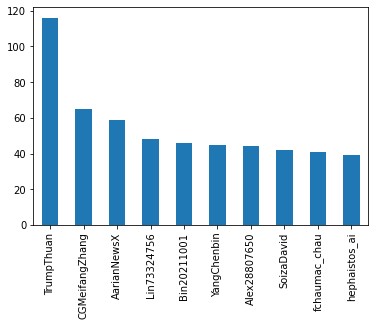

In [22]:
users_count = clean_tweet_data['original_author'].value_counts()
print(len(users_count), "users")
print("Number of posts per user")
users_count[:10].plot(kind='bar')


<AxesSubplot:ylabel='Frequency'>

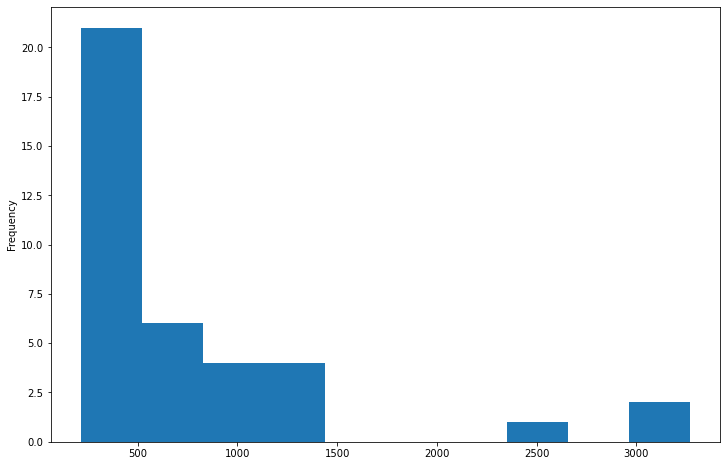

In [23]:
hot_tweets = clean_tweet_data[tweet_data['favorite_count']>200]
hot_tweets['favorite_count'].plot.hist(figsize=(12, 8))

<AxesSubplot:>

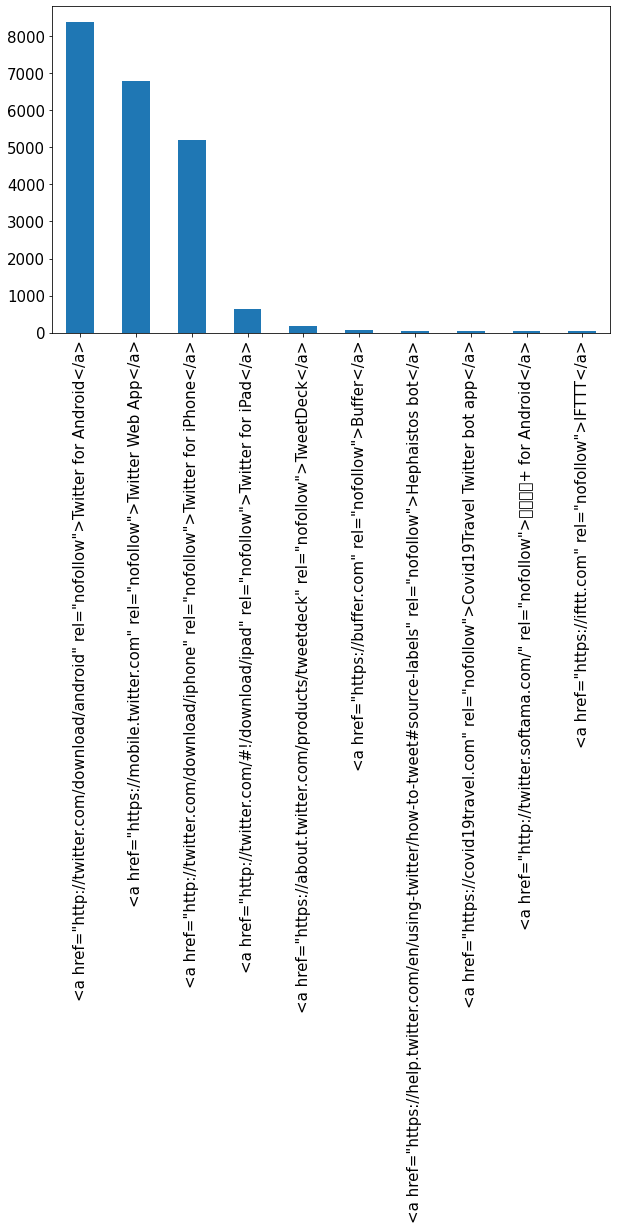

In [24]:
clean_tweet_data['source'].value_counts()[:10].plot(kind='bar', figsize=(10, 6), fontsize=15)